<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detecting_Fungal_Type_Diseases_and_Provide_the_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

In [ ]:
pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.7 MB/s eta 0:00:00


In [ ]:
import cv2
from rembg import remove
import matplotlib.pyplot as plt

def convert_image(file_path):
    try:
        image = cv2.imread(file_path)
        # plt.imshow(image)
        # plt.show()
        # image = remove(image)
        image = cv2.resize(image, (200, 200))
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # plt.imshow(gray_image)
        # plt.show()
        return {
            'state':True,
            'image':gray_image
        }
    except:
        return {
            'state': False
        }

In [ ]:
pip install -U scikit-learn

In [ ]:
from skimage.feature import local_binary_pattern

def get_lbp_feature(gray_image):
    radius = 1
    n_points = 8 * radius
    lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')
    # print(len(lbp.ravel()))
    return lbp

In [ ]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 337 (delta 144), reused 136 (delta 90), pack-reused 113
Receiving objects: 100% (337/337), 91.65 MiB | 24.34 MiB/s, done.
Resolving deltas: 100% (214/214), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dir_list = os.listdir("/content/drive/MyDrive/fungal_detection/earlyBlight")
print(dir_list[0])

1328ae8b-76e1-42e9-a0c4-7dd0612fdf99___RS_Early.B 8303.JPG


In [ ]:
image = convert_image('/content/drive/MyDrive/fungal_detection/earlyBlight/'+dir_list[0])
print(image)
lbp = get_lbp_feature(image['image'])

{'state': True, 'image': array([[159, 162, 158, ..., 202, 204, 205],
       [164, 163, 161, ..., 209, 217, 221],
       [160, 156, 161, ..., 208, 218, 225],
       ...,
       [147, 144, 147, ..., 174, 176, 182],
       [148, 145, 148, ..., 171, 174, 182],
       [148, 147, 143, ..., 173, 175, 178]], dtype=uint8)}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score
random_accuracy = []
def random_calssifier(h , y , image_path):
    np.unique(h)
    np.unique(y)

    # Shape of h
    h.shape

    # Reshape h
    h_updated = h.reshape(len(h), -1)
    h_updated.shape

    # Split data into training and testing sets
    htrain, htest, ytrain, ytest = train_test_split(h_updated, y, random_state=10, test_size=.20)

    # Print the shapes of training and testing sets
    htrain.shape, htest.shape

    # Feature scaling
    print(htrain.max(), htrain.min())
    print(htest.max(), htest.min())
    htrain = htrain / 255
    htest = htest / 255
    print(htrain.max(), htrain.min())
    print(htest.max(), htest.min())

    # Feature selection: PCA
    print(htrain.shape, htest.shape)
    pca = PCA(.98)
    pca_train = pca.fit_transform(htrain)
    pca_test = pca.transform(htest)

    # Train the Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=40)
    rf.fit(htrain, ytrain)

    # Evaluate the Random Forest model
    pred = rf.predict(htrain)
    print("Training Score:", accuracy_score(ytrain, pred))
    pred = rf.predict(htest)
    accuracy = accuracy_score(ytest, pred)
    print("Testing Score RandomClassifier:", accuracy)
    random_accuracy.append(accuracy)

    return {
        "rf":rf , "ytrain":ytrain , "ytest":ytest , "pca_train":htrain , "pca_test":htest
    }

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svm_accuracy = []
def svm_classifier(X ,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    clf = svm.SVC()  # Create an SVM classifier
    clf.fit(X_train, y_train)  # Train the classifier on the training data

    y_pred = clf.predict(X_test)  # Use the trained classifier to make predictions on the test data
    y_pred_training = clf.predict(X_train)
    accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
    accuracy2 = accuracy_score(y_train, y_pred_training)
    print("Training Score SVM Classifier:", accuracy2)
    print("Testing Score SVM Classifier:", accuracy)
    svm_accuracy.append(accuracy)
    return {
        "rf":clf , "ytrain":y_train , "ytest":y_test , "pca_train":X_train , "pca_test":X_test
    }

In [ ]:
import numpy as np

def get_lbp_output(file_paths):
    y = []
    radius = 1
    n_points = 8 * radius
    classes = {'earlyBlight': 0, 'lateBlight': 1}
    file_path = file_paths['earlyBlight'][0]
    gray_image = convert_image(file_path=file_path)['image']
    lbp = get_lbp_feature(gray_image=gray_image)
    h = np.array([[]])
    h = np.append(h, lbp.ravel())
    y.append(0)
    file_path = file_paths['earlyBlight'][1]
    gray_image = convert_image(file_path=file_path)['image']
    lbp = get_lbp_feature(gray_image=gray_image)
    h3 = np.array([[]])
    h3 = np.append(h3, lbp.ravel())
    y.append(0)
    appended_array = np.concatenate((h3.reshape(1, -1), h.reshape(1, -1)), axis=0)
    # print(appended_array)
    for clas in classes:
        file_paths_ = file_paths[clas]
        i=0
        for path in file_paths_:
            if clas == "earlyBlight" and i<2:
                i+=1
                continue
            file_path = path
            image_res = convert_image(file_path=file_path)
            # print(image_res['state'])
            if not image_res['state']:
                continue
            gray_image = image_res['image']
            lbp = get_lbp_feature(gray_image=gray_image)
            # print(lbp.ravel())
            h2 = np.array([[]])
            h2 = np.append(h2, lbp.ravel())
            appended_array = np.concatenate((appended_array, h2.reshape(1, -1)), axis=0)
            y.append(classes[clas])
            # Calculate the histogram of LBP values
            # hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
            #
            # # Normalize the histogram
            # hist = hist.astype("float")
            # hist /= (hist.sum() + 1e-7)
            #
            # # Display the original image and the LBP histogram
            # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
            # ax1.set_title(clas)
            # ax1.imshow(gray_image)
            # ax1.axis('off')
            # ax2.bar(np.arange(0, n_points + 2), hist)
            # ax2.set_title("LBP Histogram")
            # ax2.set_xlabel("LBP Bin")
            # ax2.set_ylabel("Frequency")

    print(appended_array)
    print(y)
    rf = random_calssifier(appended_array, y,"")
    svm = svm_classifier(appended_array, Y=y)
    return {
        "rf":rf,
        "svm":svm
    }
    # plt.show()

In [ ]:
from skimage.feature import hog
from skimage import exposure

def get_hog_feature(gray_image):
    hogfv, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(16, 16),
                           cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 5))
    # print(hog_image_rescaled[0])
    # print(len(hog_image_rescaled[0]))
    return hog_image_rescaled

In [ ]:
import numpy as np

def get_hog_output(file_paths):
    y = []
    radius = 1
    n_points = 8 * radius
    classes = {'earlyBlight': 0, 'lateBlight': 1}
    file_path = file_paths['earlyBlight'][0]
    gray_image = convert_image(file_path=file_path)['image']
    hog = get_hog_feature(gray_image=gray_image)
    h = np.array([[]])
    h = np.append(h, hog)
    y.append(0)
    file_path = file_paths['earlyBlight'][1]
    gray_image = convert_image(file_path=file_path)['image']
    hog = get_hog_feature(gray_image=gray_image)
    h3 = np.array([[]])
    h3 = np.append(h3, hog)
    y.append(0)
    appended_array = np.concatenate((h3.reshape(1, -1), h.reshape(1, -1)), axis=0)
    # print(appended_array)
    hist_count = 0
    for clas in classes:
        file_paths_ = file_paths[clas]
        i=0
        for path in file_paths_:
            if clas == "earlyBlight" and i<2:
                i+=1
                continue
            file_path = path
            image_res = convert_image(file_path=file_path)
            # print(image_res['state'])
            if not image_res['state']:
                continue
            gray_image = image_res['image']
            hog = get_hog_feature(gray_image=gray_image)
            # print(hog.ravel())
            h2 = np.array([[]])
            h2 = np.append(h2, hog)
            appended_array = np.concatenate((appended_array, h2.reshape(1, -1)), axis=0)
            y.append(classes[clas])
            # Calculate the histogram of LBP values
            # if hist_count<1:
            #   hist, _ = np.histogram(hog, bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

            # # Normalize the histogram
            #   hist = hist.astype("float")
            #   hist /= (hist.sum() + 1e-7)

            # # Display the original image and the LBP histogram
            #   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
            #   ax1.set_title(clas)
            #   # ax1.imshow(gray_image)
            #   ax1.axis('off')
            #   ax2.bar(np.arange(0, n_points + 2), hist)
            #   ax2.set_title("HOG Histogram")
            #   ax2.set_xlabel("HOG Bin")
            #   ax2.set_ylabel("Frequency")
            #   hist_count+=1

    print(appended_array)
    print(y)
    rf = random_calssifier(appended_array, y,"")
    svm = svm_classifier(appended_array, Y=y)
    return {
        "rf":rf,
        "svm":svm
    }
    # plt.show()

In [ ]:
import cv2
import numpy as np

def get_css_feature(gray_image):
    _, threshold = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # Apply Otsu's thresholding

    contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  # Find contours

    css_features = []  # List to store CSS features
    i =0
    if len(contours)<100:
        return "small"
    for contour in contours:
        i+=1
        x, y, w, h = cv2.boundingRect(contour)  # Bounding rectangle coordinates and dimensions

        # Extract CSS features
        css_features.append([x / 100, y / 100, w / 100, h / 100
                             ])
        if i>=100:
            break
    return css_features

In [ ]:
import numpy as np

def get_css_output(file_paths):
    y = []
    radius = 1
    n_points = 8 * radius
    classes = {'earlyBlight': 0, 'lateBlight': 1}
    file_path = file_paths['earlyBlight'][0]
    gray_image = convert_image(file_path=file_path)['image']
    css = get_css_feature(gray_image=gray_image)
    h = np.array([[]])
    h = np.append(h, css)
    y.append(0)
    file_path = file_paths['earlyBlight'][1]
    gray_image = convert_image(file_path=file_path)['image']
    css = get_css_feature(gray_image=gray_image)
    h3 = np.array([[]])
    h3 = np.append(h3, css)
    y.append(0)
    appended_array = np.concatenate((h3.reshape(1, -1), h.reshape(1, -1)), axis=0)
    for clas in classes:
        file_paths_ = file_paths[clas]
        i=0
        for path in file_paths_:
            if clas == "earlyBlight" and i<2:
                i+=1
                continue
            file_path = path
            image_res = convert_image(file_path=file_path)
            if not image_res['state']:
                continue
            gray_image = image_res['image']
            css = get_css_feature(gray_image=gray_image)
            if css == "small":
                continue
            h2 = np.array([[]])
            h2 = np.append(h2, css)
            appended_array = np.concatenate((appended_array, h2.reshape(1, -1)), axis=0)
            y.append(classes[clas])
            # Calculate the histogram of LBP values
            # hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
            #
            # # Normalize the histogram
            # hist = hist.astype("float")
            # hist /= (hist.sum() + 1e-7)
            #
            # # Display the original image and the LBP histogram
            # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
            # ax1.set_title(clas)
            # ax1.imshow(gray_image)
            # ax1.axis('off')
            # ax2.bar(np.arange(0, n_points + 2), hist)
            # ax2.set_title("LBP Histogram")
            # ax2.set_xlabel("LBP Bin")
            # ax2.set_ylabel("Frequency")

    print(appended_array)
    print(y)
    rf = random_calssifier(appended_array, y,"")
    svm = svm_classifier(appended_array, Y=y)
    return {
        "rf":rf,
        "svm":svm
    }
    # plt.show()

In [ ]:
import numpy as np

def get_lbp_hog_output(file_paths):
    y = []
    radius = 1
    n_points = 8 * radius
    classes = {'earlyBlight': 0, 'lateBlight': 1}
    file_path = file_paths['earlyBlight'][0]
    gray_image = convert_image(file_path=file_path)['image']
    hog = get_hog_feature(gray_image=gray_image)
    h = np.array([[]])
    h = np.append(h, hog)
    y.append(0)
    file_path = file_paths['earlyBlight'][1]
    gray_image = convert_image(file_path=file_path)['image']
    hog = get_hog_feature(gray_image=gray_image)
    h3 = np.array([[]])
    h3 = np.append(h3, hog)
    y.append(0)
    appended_array = np.concatenate((h3.reshape(1, -1), h.reshape(1, -1)), axis=0)
    for clas in classes:
        file_paths_ = file_paths[clas]
        i=0
        for path in file_paths_:
            if clas == "earlyBlight" and i<2:
                i+=1
                continue
            file_path = path
            image_res = convert_image(file_path=file_path)
            if not image_res['state']:
                continue
            gray_image = image_res['image']
            hog = get_hog_feature(gray_image=gray_image)
            h2 = np.array([[]])
            h2 = np.append(h2, hog)
            appended_array = np.concatenate((appended_array, h2.reshape(1, -1)), axis=0)
            y.append(classes[clas])
            lbp = get_lbp_feature(gray_image=gray_image)
            h2 = np.array([[]])
            h2 = np.append(h2, lbp.ravel())
            appended_array = np.concatenate((appended_array, h2.reshape(1, -1)), axis=0)
            y.append(classes[clas])
            # Calculate the histogram of LBP values
            # hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
            #
            # # Normalize the histogram
            # hist = hist.astype("float")
            # hist /= (hist.sum() + 1e-7)
            #
            # # Display the original image and the LBP histogram
            # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
            # ax1.set_title(clas)
            # ax1.imshow(gray_image)
            # ax1.axis('off')
            # ax2.bar(np.arange(0, n_points + 2), hist)
            # ax2.set_title("LBP Histogram")
            # ax2.set_xlabel("LBP Bin")
            # ax2.set_ylabel("Frequency")

    print(appended_array)
    print(y)
    rf = random_calssifier(appended_array, y,"")
    svm = svm_classifier(appended_array, Y=y)
    return {
        "rf":rf,
        "svm":svm
    }
    # plt.show()

In [ ]:
import cv2

def get_sift_feature(gray_image):

    sift = cv2.SIFT_create()  # Create SIFT object

    # Detect keypoints and compute descriptors
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    result = descriptors.flatten()
    if len(result)<=25000:
        return "small"
    return descriptors[0:20000][0]

In [ ]:
import numpy as np

def get_sift_output(file_paths):
    y = []
    radius = 1
    n_points = 8 * radius
    classes = {'earlyBlight': 0, 'lateBlight': 1}
    file_path = file_paths['earlyBlight'][0]
    gray_image = convert_image(file_path=file_path)['image']
    sift = get_sift_feature(gray_image=gray_image)
    h = np.array([[]])
    h = np.append(h, sift)
    y.append(0)
    file_path = file_paths['earlyBlight'][1]
    gray_image = convert_image(file_path=file_path)['image']
    sift = get_sift_feature(gray_image=gray_image)
    h3 = np.array([[]])
    h3 = np.append(h3, sift)
    y.append(0)
    appended_array = np.concatenate((h3.reshape(1, -1), h.reshape(1, -1)), axis=0)
    for clas in classes:
        file_paths_ = file_paths[clas]
        i=0
        for path in file_paths_:
            if clas == "earlyBlight" and i<2:
                i+=1
                continue
            file_path = path
            image_res = convert_image(file_path=file_path)
            if not image_res['state']:
                continue
            gray_image = image_res['image']
            sift = get_sift_feature(gray_image=gray_image)
            # print(sift)
            if sift == "small":
                continue
            h2 = np.array([[]])
            # print(sift['result'])
            h2 = np.append(h2, sift)
            appended_array = np.concatenate((appended_array, h2.reshape(1, -1)), axis=0)
            y.append(classes[clas])
            # Calculate the histogram of LBP values
            # hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
            #
            # # Normalize the histogram
            # hist = hist.astype("float")
            # hist /= (hist.sum() + 1e-7)
            #
            # # Display the original image and the LBP histogram
            # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
            # ax1.set_title(clas)
            # ax1.imshow(gray_image)
            # ax1.axis('off')
            # ax2.bar(np.arange(0, n_points + 2), hist)
            # ax2.set_title("LBP Histogram")
            # ax2.set_xlabel("LBP Bin")
            # ax2.set_ylabel("Frequency")

    print(appended_array)
    print(y)
    rf = random_calssifier(appended_array, y,"")
    svm = svm_classifier(appended_array, Y=y)
    return {
        "rf":rf,
        "svm":svm
    }

In [ ]:
import os

folder_path = '/content/drive/MyDrive/fungal_detection/earlyBlight'  # Replace with the path to your folder
folder_path2 = '/content/drive/MyDrive/fungal_detection/lateBlight'
# Get the list of files in the folder
file_list = os.listdir(folder_path)
file_list2 = os.listdir(folder_path2)
file_paths_early = []
file_paths_late = []
# Iterate over the files
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    file_paths_early.append(file_path)

for file_name in file_list2:
    file_path = os.path.join(folder_path2, file_name)
    file_paths_late.append(file_path)

def get_file_paths():
    global file_paths_late , file_paths_early
    response = {
        'earlyBlight': file_paths_early[0:100],
        'lateBlight': file_paths_late[0:100]
    }
    return response

PreProcess

In [ ]:
response = get_file_paths()
print(response)
processed_images_earliBlight = []
processed_images_lateBlight = []
for path in response['earlyBlight']:
  image_res = convert_image(file_path=path)
  # print(image_res['state'])
  if not image_res['state']:
      continue
  gray_image = image_res['image']
  processed_images_earliBlight.append(gray_image)

for path in response['lateBlight']:
  image_res = convert_image(file_path=path)
  # print(image_res['state'])
  if not image_res['state']:
      continue
  gray_image = image_res['image']
  processed_images_lateBlight.append(gray_image)

{'earlyBlight': ['/content/drive/MyDrive/fungal_detection/earlyBlight/1328ae8b-76e1-42e9-a0c4-7dd0612fdf99___RS_Early.B 8303.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/04ee51b6-07e2-4182-84f8-46b22c8938a2___RS_Early.B 8091.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/060fd5a7-1606-4a59-895b-604c90d6b414___RS_Early.B 7205.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/096a2c48-104c-4570-9e34-8dd60aa5ebcf___RS_Early.B 6979.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/08a892eb-19cc-45ea-babc-181b98f89238___RS_Early.B 7367.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0d2e2971-f1c9-4278-b35c-91dd8a22a64d___RS_Early.B 7581.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0bbb8bce-2020-416b-8bd6-c160c2db9921___RS_Early.B 8386.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/10a3920b-dd04-406d

**LBP Implementation (Random Forest Classifier  & Support Vector Machine Classifier)**

In [ ]:
response = get_file_paths()
print(response)
feature_methods = []
feature_methods.append("lbp")

{'earlyBlight': ['/content/drive/MyDrive/fungal_detection/earlyBlight/1328ae8b-76e1-42e9-a0c4-7dd0612fdf99___RS_Early.B 8303.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/04ee51b6-07e2-4182-84f8-46b22c8938a2___RS_Early.B 8091.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/060fd5a7-1606-4a59-895b-604c90d6b414___RS_Early.B 7205.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/096a2c48-104c-4570-9e34-8dd60aa5ebcf___RS_Early.B 6979.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/08a892eb-19cc-45ea-babc-181b98f89238___RS_Early.B 7367.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0d2e2971-f1c9-4278-b35c-91dd8a22a64d___RS_Early.B 7581.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0bbb8bce-2020-416b-8bd6-c160c2db9921___RS_Early.B 8386.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/10a3920b-dd04-406d

LBP EVALUATION (RandomClassifire

Training Precision: 1.0
Testing Precision: 0.55
Training Recall: 1.0
Testing Recall: 0.55
Training F1 Score: 1.0
Testing F1 Score: 0.55


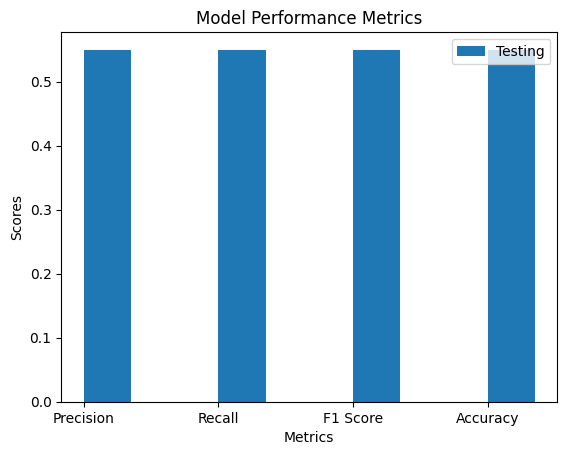

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_precision = precision_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_recall = recall_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_recall = recall_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_f1 = f1_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_f1 = f1_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']))
test_accuracy = accuracy_score(rf['ytest'], rf['rf'].predict(rf['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

EVALUATION SVMClassifier => LBP

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Precision: 1.0
Testing Precision: 0.22562500000000002
Training Recall: 1.0
Testing Recall: 0.475
Training F1 Score: 1.0
Testing F1 Score: 0.3059322033898305


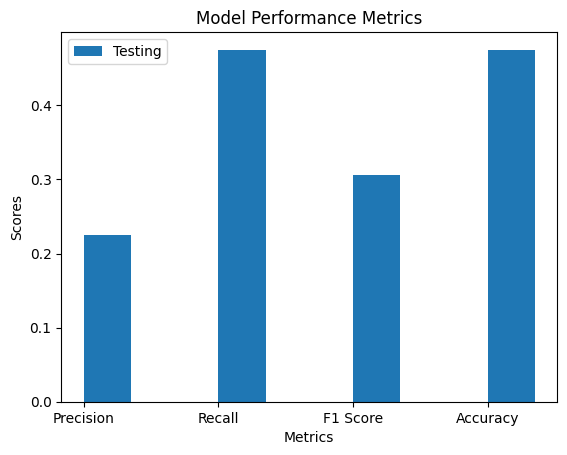

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_precision = precision_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_recall = recall_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_recall = recall_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_f1 = f1_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_f1 = f1_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']))
test_accuracy = accuracy_score(svm['ytest'], svm['rf'].predict(svm['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

HOG Implementation (Random Forest Classifier  & Support Vector Machine Classifier)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svm_accuracy = []
def svm_classifier(X ,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    clf = svm.SVC()  # Create an SVM classifier
    clf.fit(X_train, y_train)  # Train the classifier on the training data

    y_pred = clf.predict(X_test)  # Use the trained classifier to make predictions on the test data
    y_pred_training = clf.predict(X_train)
    accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
    accuracy2 = accuracy_score(y_train, y_pred_training)
    print("Training Score SVM Classifier:", accuracy2)
    print("Testing Score SVM Classifier:", accuracy)
    svm_accuracy.append(accuracy)
    return {
        "rf":clf , "ytrain":y_train , "ytest":y_test , "pca_train":X_train , "pca_test":X_test
    }

In [ ]:
response = get_file_paths()
print(response)
feature_methods.append("hog")
classifier = get_hog_output(response)
rf = classifier['rf']
svm = classifier['svm']

{'earlyBlight': ['/content/drive/MyDrive/fungal_detection/earlyBlight/1328ae8b-76e1-42e9-a0c4-7dd0612fdf99___RS_Early.B 8303.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/04ee51b6-07e2-4182-84f8-46b22c8938a2___RS_Early.B 8091.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/060fd5a7-1606-4a59-895b-604c90d6b414___RS_Early.B 7205.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/096a2c48-104c-4570-9e34-8dd60aa5ebcf___RS_Early.B 6979.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/08a892eb-19cc-45ea-babc-181b98f89238___RS_Early.B 7367.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0d2e2971-f1c9-4278-b35c-91dd8a22a64d___RS_Early.B 7581.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0bbb8bce-2020-416b-8bd6-c160c2db9921___RS_Early.B 8386.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/10a3920b-dd04-406d

EVALUATION RandomClassifire => HOG

Training Precision: 1.0
Testing Precision: 0.976086956521739
Training Recall: 1.0
Testing Recall: 0.975
Training F1 Score: 1.0
Testing F1 Score: 0.9749206349206349


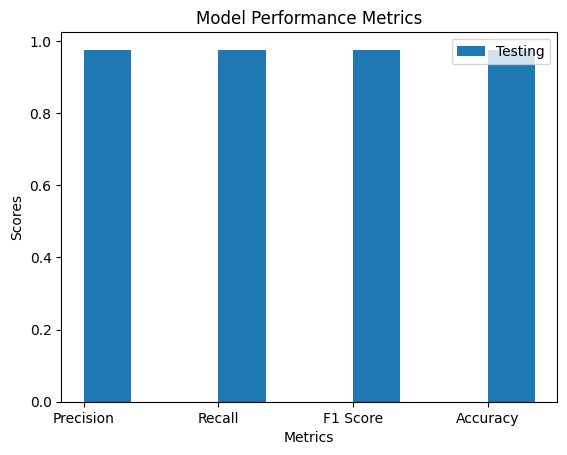

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_precision = precision_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_recall = recall_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_recall = recall_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_f1 = f1_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_f1 = f1_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']))
test_accuracy = accuracy_score(rf['ytest'], rf['rf'].predict(rf['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

EVALUATION SVM CLassifier => HOG

Training Precision: 0.9261109372555156
Testing Precision: 0.7751262626262626
Training Recall: 0.925
Testing Recall: 0.775
Training F1 Score: 0.9249765588373183
Testing F1 Score: 0.7745757385292269


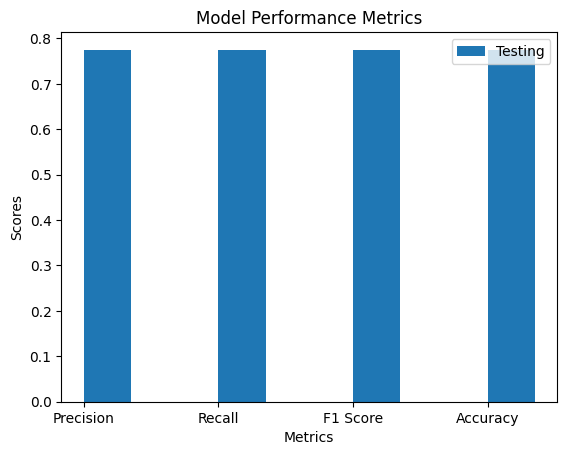

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_precision = precision_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_recall = recall_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_recall = recall_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_f1 = f1_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_f1 = f1_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']))
test_accuracy = accuracy_score(svm['ytest'], svm['rf'].predict(svm['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

CSS EVALUATION

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svm_accuracy = []
def svm_classifier(X ,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    clf = svm.SVC()  # Create an SVM classifier
    clf.fit(X_train, y_train)  # Train the classifier on the training data

    y_pred = clf.predict(X_test)  # Use the trained classifier to make predictions on the test data
    y_pred_training = clf.predict(X_train)
    accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
    accuracy2 = accuracy_score(y_train, y_pred_training)
    print("Training Score SVM Classifier:", accuracy2)
    print("Testing Score SVM Classifier:", accuracy)
    svm_accuracy.append(accuracy)
    return {
        "rf":clf , "ytrain":y_train , "ytest":y_test , "pca_train":X_train , "pca_test":X_test
    }

In [ ]:
response = get_file_paths()
print(response)
feature_methods.append("css")
classifier =  get_css_output(response)
rf = classifier['rf']
svm = classifier['svm']

{'earlyBlight': ['/content/drive/MyDrive/fungal_detection/earlyBlight/1328ae8b-76e1-42e9-a0c4-7dd0612fdf99___RS_Early.B 8303.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/04ee51b6-07e2-4182-84f8-46b22c8938a2___RS_Early.B 8091.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/060fd5a7-1606-4a59-895b-604c90d6b414___RS_Early.B 7205.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/096a2c48-104c-4570-9e34-8dd60aa5ebcf___RS_Early.B 6979.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/08a892eb-19cc-45ea-babc-181b98f89238___RS_Early.B 7367.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0d2e2971-f1c9-4278-b35c-91dd8a22a64d___RS_Early.B 7581.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0bbb8bce-2020-416b-8bd6-c160c2db9921___RS_Early.B 8386.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/10a3920b-dd04-406d

EVALUATION RandomClassifire => CSS

Training Precision: 1.0
Testing Precision: 0.6547619047619047
Training Recall: 1.0
Testing Recall: 0.6285714285714286
Training F1 Score: 1.0
Testing F1 Score: 0.6285714285714286


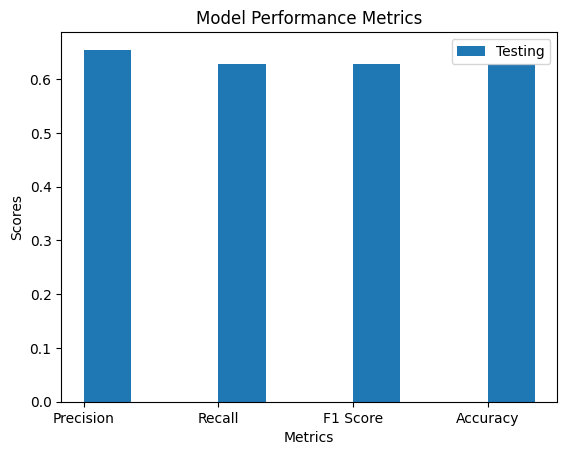

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_precision = precision_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_recall = recall_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_recall = recall_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_f1 = f1_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_f1 = f1_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']))
test_accuracy = accuracy_score(rf['ytest'], rf['rf'].predict(rf['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

EVALUATION SVMClassifier => CSS

Training Precision: 0.7892960462873674
Testing Precision: 0.7898617511520737
Training Recall: 0.6617647058823529
Testing Recall: 0.6571428571428571
Training F1 Score: 0.5959274782804195
Testing F1 Score: 0.5954285714285714


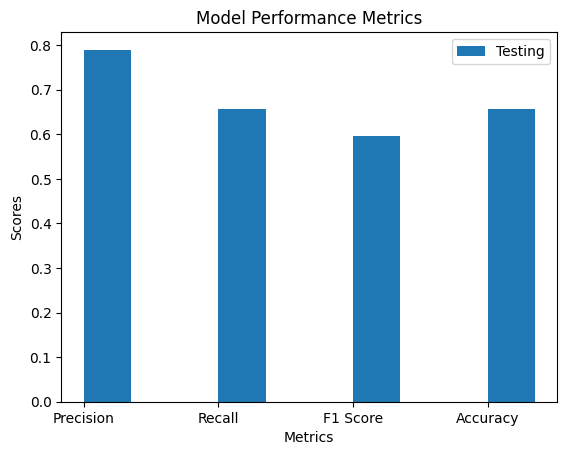

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_precision = precision_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_recall = recall_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_recall = recall_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_f1 = f1_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_f1 = f1_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']))
test_accuracy = accuracy_score(svm['ytest'], svm['rf'].predict(svm['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

LBP+HOG EVALUATION

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svm_accuracy = []
def svm_classifier(X ,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    clf = svm.SVC()  # Create an SVM classifier
    clf.fit(X_train, y_train)  # Train the classifier on the training data

    y_pred = clf.predict(X_test)  # Use the trained classifier to make predictions on the test data
    y_pred_training = clf.predict(X_train)
    accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
    accuracy2 = accuracy_score(y_train, y_pred_training)
    print("Training Score SVM Classifier:", accuracy2)
    print("Testing Score SVM Classifier:", accuracy)
    svm_accuracy.append(accuracy)
    return {
        "rf":clf , "ytrain":y_train , "ytest":y_test , "pca_train":X_train , "pca_test":X_test
    }

In [ ]:
response = get_file_paths()
print(response)
feature_methods.append("lbp+hog")
classifier = get_lbp_hog_output(response)
rf = classifier['rf']
svm = classifier['svm']

{'earlyBlight': ['/content/drive/MyDrive/fungal_detection/earlyBlight/1328ae8b-76e1-42e9-a0c4-7dd0612fdf99___RS_Early.B 8303.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/04ee51b6-07e2-4182-84f8-46b22c8938a2___RS_Early.B 8091.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/060fd5a7-1606-4a59-895b-604c90d6b414___RS_Early.B 7205.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/096a2c48-104c-4570-9e34-8dd60aa5ebcf___RS_Early.B 6979.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/08a892eb-19cc-45ea-babc-181b98f89238___RS_Early.B 7367.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0d2e2971-f1c9-4278-b35c-91dd8a22a64d___RS_Early.B 7581.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0bbb8bce-2020-416b-8bd6-c160c2db9921___RS_Early.B 8386.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/10a3920b-dd04-406d

EVALUATION RandomClassifire => LBP+HOG

Training Precision: 1.0
Testing Precision: 0.6378125000000001
Training Recall: 1.0
Testing Recall: 0.6375
Training F1 Score: 1.0
Testing F1 Score: 0.6375566494764808


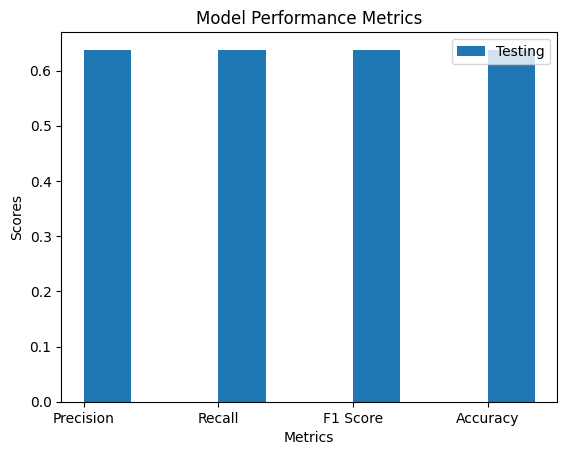

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_precision = precision_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_recall = recall_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_recall = recall_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_f1 = f1_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_f1 = f1_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']))
test_accuracy = accuracy_score(rf['ytest'], rf['rf'].predict(rf['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

EVALUATION SVMClassifier => LBP+HOG

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Precision: 0.8408514349135882
Testing Precision: 0.19140625
Training Recall: 0.7704402515723271
Testing Recall: 0.4375
Training F1 Score: 0.7552705667088705
Testing F1 Score: 0.266304347826087


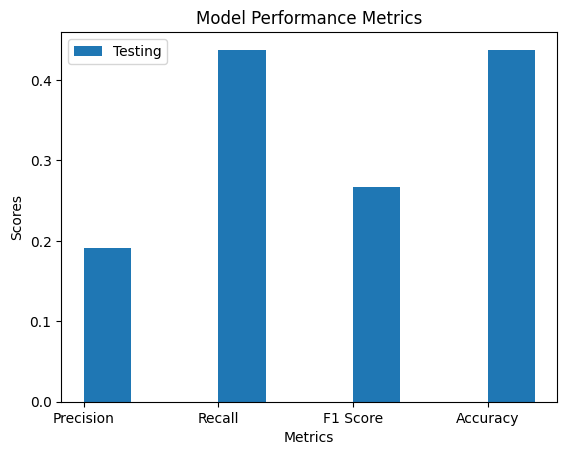

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_precision = precision_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_recall = recall_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_recall = recall_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_f1 = f1_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_f1 = f1_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']))
test_accuracy = accuracy_score(svm['ytest'], svm['rf'].predict(svm['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

SIFT EVALUATION

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
svm_accuracy = []
def svm_classifier(X ,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    clf = svm.SVC()  # Create an SVM classifier
    clf.fit(X_train, y_train)  # Train the classifier on the training data

    y_pred = clf.predict(X_test)  # Use the trained classifier to make predictions on the test data
    y_pred_training = clf.predict(X_train)
    accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
    accuracy2 = accuracy_score(y_train, y_pred_training)
    print("Training Score SVM Classifier:", accuracy2)
    print("Testing Score SVM Classifier:", accuracy)
    svm_accuracy.append(accuracy)
    return {
        "rf":clf , "ytrain":y_train , "ytest":y_test , "pca_train":X_train , "pca_test":X_test
    }

In [ ]:
response = get_file_paths()
print(response)
feature_methods.append("sift")
classifier = get_sift_output(response)
# print(classifier)
rf = classifier['rf']
svm = classifier['svm']

{'earlyBlight': ['/content/drive/MyDrive/fungal_detection/earlyBlight/1328ae8b-76e1-42e9-a0c4-7dd0612fdf99___RS_Early.B 8303.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/04ee51b6-07e2-4182-84f8-46b22c8938a2___RS_Early.B 8091.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/060fd5a7-1606-4a59-895b-604c90d6b414___RS_Early.B 7205.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/096a2c48-104c-4570-9e34-8dd60aa5ebcf___RS_Early.B 6979.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/08a892eb-19cc-45ea-babc-181b98f89238___RS_Early.B 7367.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0d2e2971-f1c9-4278-b35c-91dd8a22a64d___RS_Early.B 7581.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/0bbb8bce-2020-416b-8bd6-c160c2db9921___RS_Early.B 8386.JPG', '/content/drive/MyDrive/fungal_detection/earlyBlight/10a3920b-dd04-406d

<ipython-input-25-6fa68cd366e5>:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sift == "small":


[[  0.  56. 105. ...   5.  17.  16.]
 [ 38.   6.   0. ...   0.   0.   0.]
 [ 46.   1.   0. ...   2.   2.   0.]
 ...
 [  0.   1.   5. ...   2.   6.  30.]
 [116.   6.   0. ...   2.   8.  24.]
 [ 50.   1.   0. ...   1.   6.   1.]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
203.0 0.0
207.0 0.0
0.796078431372549 0.0
0.8117647058823529 0.0
(144, 128) (36, 128)
Training Score: 1.0
Testing Score RandomClassifier: 0.5555555555555556
Training Score SVM Classifier: 0.7777777777777778
Testing Score SVM Classi

EVALUATION RandomClassifire => SIFT

Training Precision: 1.0
Testing Precision: 0.5168650793650793
Training Recall: 1.0
Testing Recall: 0.5555555555555556
Training F1 Score: 1.0
Testing F1 Score: 0.5216161616161616


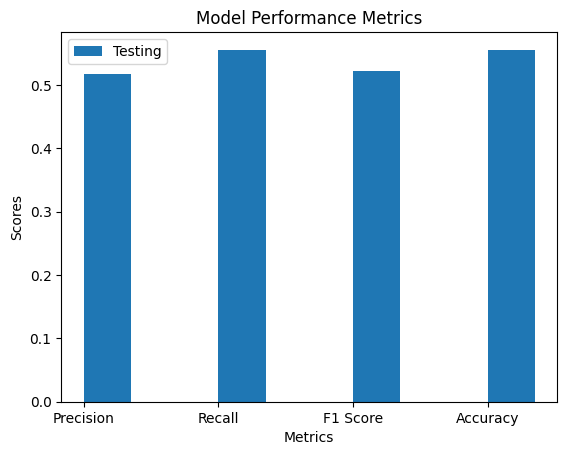

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_precision = precision_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_recall = recall_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_recall = recall_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_f1 = f1_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_f1 = f1_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']))
test_accuracy = accuracy_score(rf['ytest'], rf['rf'].predict(rf['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

EVALUATION SVMClassifier => SIFT

Training Precision: 0.7775613978145623
Testing Precision: 0.5729166666666666
Training Recall: 0.7777777777777778
Testing Recall: 0.5833333333333334
Training F1 Score: 0.7775187775187775
Testing F1 Score: 0.5740740740740741


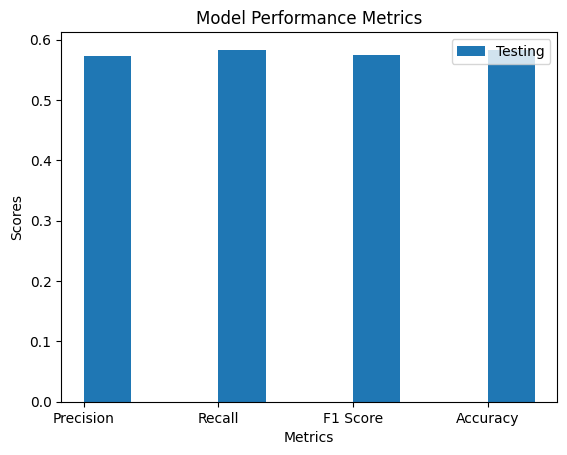

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_precision = precision_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_recall = recall_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_recall = recall_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_f1 = f1_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_f1 = f1_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']))
test_accuracy = accuracy_score(svm['ytest'], svm['rf'].predict(svm['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

Final Comparison Graph

['lbp', 'hog', 'css', 'lbp+hog', 'sift'] [0.55, 0.975, 0.6285714285714286, 0.6375, 0.5555555555555556]


ValueError: ignored

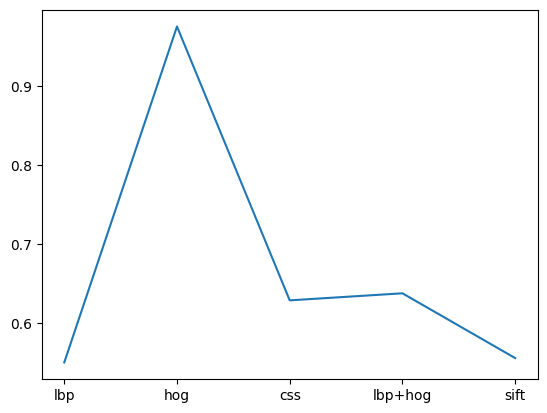

In [ ]:
import matplotlib.pyplot as plt

# line 1 points
# plotting the line 1 points
print(feature_methods , random_accuracy)
# random_accuracy.append(0.5588235294117647)
plt.plot(feature_methods, random_accuracy, label="Random Classifier")

# line 2 points
# plotting the line 2 points
svm_accuracy.append(0.5588)
plt.plot(feature_methods, svm_accuracy, label="SVM Classifier")

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
# giving a title to my graph
plt.title('Two lines on same graph!')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

EVALUATION

Training Precision: 1.0
Testing Precision: 0.5168650793650793
Training Recall: 1.0
Testing Recall: 0.5555555555555556
Training F1 Score: 1.0
Testing F1 Score: 0.5216161616161616


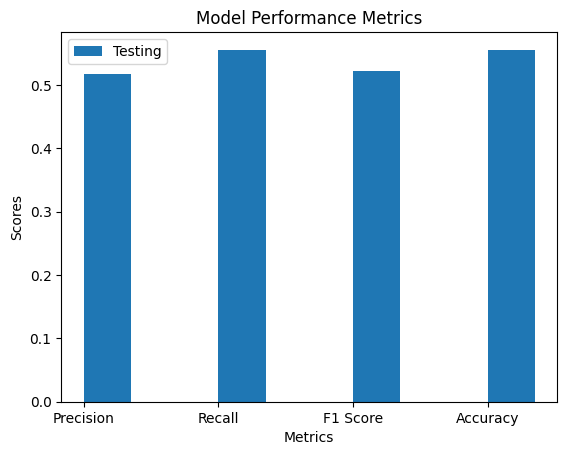

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_precision = precision_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_recall = recall_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_recall = recall_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

train_f1 = f1_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']), average='weighted')
test_f1 = f1_score(rf['ytest'], rf['rf'].predict(rf['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']))
test_accuracy = accuracy_score(rf['ytest'], rf['rf'].predict(rf['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

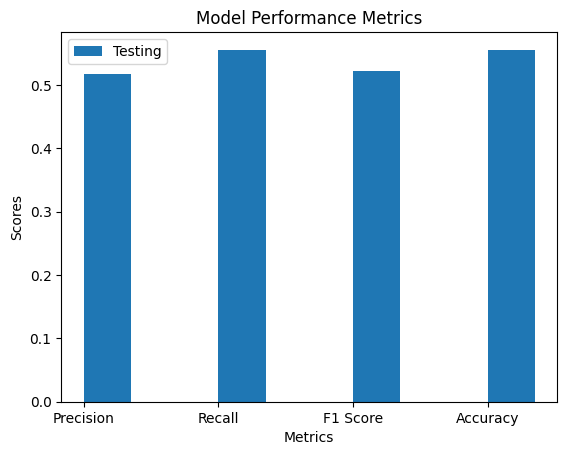

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

train_accuracy = accuracy_score(rf['ytrain'], rf['rf'].predict(rf['pca_train']))
test_accuracy = accuracy_score(rf['ytest'], rf['rf'].predict(rf['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

Training Precision: 0.7775613978145623
Testing Precision: 0.5729166666666666
Training Recall: 0.7777777777777778
Testing Recall: 0.5833333333333334
Training F1 Score: 0.7775187775187775
Testing F1 Score: 0.5740740740740741


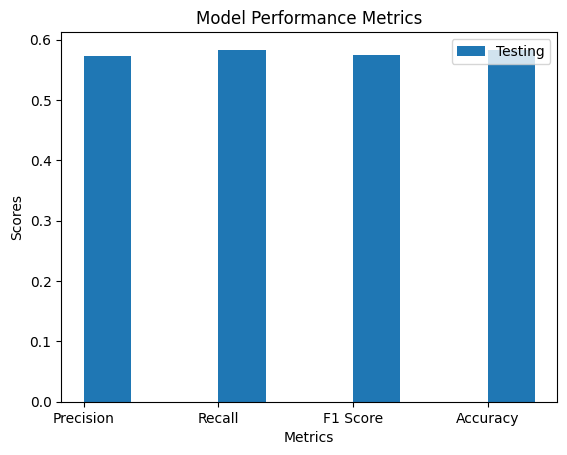

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate precision, recall, and F1 score on the training and testing data
train_precision = precision_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_precision = precision_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_recall = recall_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_recall = recall_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

train_f1 = f1_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']), average='weighted')
test_f1 = f1_score(svm['ytest'], svm['rf'].predict(svm['pca_test']), average='weighted')

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

train_accuracy = accuracy_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']))
test_accuracy = accuracy_score(svm['ytest'], svm['rf'].predict(svm['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()

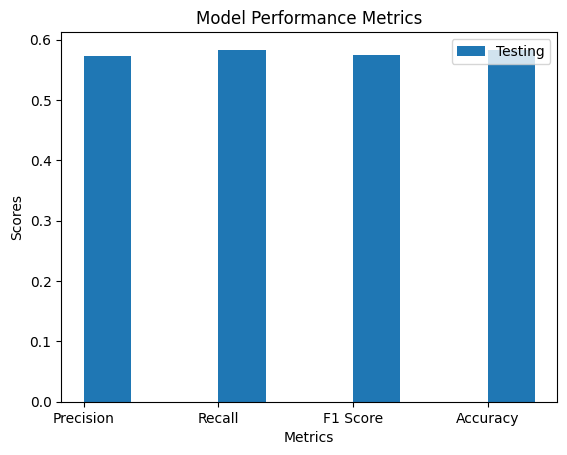

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

train_accuracy = accuracy_score(svm['ytrain'], svm['rf'].predict(svm['pca_train']))
test_accuracy = accuracy_score(svm['ytest'], svm['rf'].predict(svm['pca_test']))

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
train_scores = [train_precision, train_recall, train_f1, train_accuracy]
test_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the positions of the bars on the x-axis
x = np.arange(len(metrics))

# Set the width of the bars
width = 0.35

# Plot the training scores
###plt.bar(x - width/2, train_scores, width, label='Training')
# Plot the testing scores
plt.bar(x + width/2, test_scores, width, label='Testing')

# Set the x-axis labels
plt.xlabel('Metrics')
# Set the y-axis label
plt.ylabel('Scores')
# Set the title
plt.title('Model Performance Metrics')

# Set the tick labels on the x-axis
plt.xticks(x, metrics)
# Set the legend
plt.legend()

# Show the plot
plt.show()